##Loading Raw Dataset

In [86]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("stock_market_data.csv")
df

,Date,Open,High,Low,Close,Volume,Ticker,Daily_Change,PercentageChange
0,2020-01-02 00:00:00-05:00,71.721026,72.776606,71.466820,72.716080,135480400,AAPL,0.995053,1.387394
1,2020-01-03 00:00:00-05:00,71.941328,72.771745,71.783962,72.009117,146322800,AAPL,0.067789,0.094228
2,2020-01-06 00:00:00-05:00,71.127873,72.621654,70.876083,72.582916,118387200,AAPL,1.455043,2.045672
3,2020-01-07 00:00:00-05:00,72.592601,72.849231,72.021238,72.241554,108872000,AAPL,-0.351047,-0.483585
4,2020-01-08 00:00:00-05:00,71.943751,73.706271,71.943751,73.403641,132079200,AAPL,1.459889,2.029209
...,...,...,...,...,...,...,...,...,...
12765,2025-01-24 00:00:00-05:00,176.000000,180.429993,174.369995,176.059998,9304200,BA,0.059998,0.034090
12766,2025-01-27 00:00:00-05:00,175.550003,178.179993,174.399994,175.160004,7148600,BA,-0.389999,-0.222159
12767,2025-01-28 00:00:00-05:00,181.309998,188.479996,174.020004,177.779999,22768900,BA,-3.529999,-1.946941
12768,2025-01-29 00:00:00-05:00,179.130005,182.550003,170.649994,173.660004,12263500,BA,-5.470001,-3.053649


## Transforming original dataset

In [87]:
# Create a binary label "Direction"
df['Direction'] = np.where(df['PercentageChange'] >= 0, 'Up', 'Down')

# Transform Quantitative Data to Qualitative
df['Price_Change_Category'] = pd.cut(df['Daily_Change'],
                                     bins=[-np.inf, -2, 0, 2, np.inf],
                                     labels=['Big Drop', 'Small Drop', 'Small Rise', 'Big Rise'],
                                     right=False)

# Transform PercentageChange into qualitative categories.
df['PercentageChange_Category'] = pd.cut(df['PercentageChange'],
                                         bins=[-np.inf, -5, -1, 1, 5, np.inf],
                                         labels=['Significant Loss', 'Moderate Loss', 'Neutral', 'Moderate Gain', 'Significant Gain'],
                                         right=False)

# Transform Volume into qualitative categories based on quartiles using qcut
df['Volume_Category'] = pd.qcut(df['Volume'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

df = df.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker', 'Daily_Change', 'PercentageChange'], axis=1).reset_index(drop=True)


# Display the Transformed Data
print("Transformed Stock Market Data:")
print(df[['Price_Change_Category', 'Volume_Category','PercentageChange_Category','Direction']])

# Save the updated dataset to a new CSV file
df.to_csv("stock_market_data_transformed.csv", index=False)


Transformed Stock Market Data:
      Price_Change_Category Volume_Category PercentageChange_Category  \
0                Small Rise       Very High             Moderate Gain   
1                Small Rise       Very High                   Neutral   
2                Small Rise       Very High             Moderate Gain   
3                Small Drop       Very High                   Neutral   
4                Small Rise       Very High             Moderate Gain   
...                     ...             ...                       ...   
12765            Small Rise             Low                   Neutral   
12766            Small Drop             Low                   Neutral   
12767              Big Drop          Medium             Moderate Loss   
12768              Big Drop             Low             Moderate Loss   
12769              Big Rise             Low             Moderate Gain   

      Direction  
0            Up  
1            Up  
2            Up  
3          Down  
4 

##Naïve Bayes Classifiers

##MultinomialNB

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv("stock_market_data_transformed.csv")

# Multinomial Naïve Bayes Modeling

# Feature Selection & Train-Test Split
features = ['Price_Change_Category', 'Volume_Category', 'PercentageChange_Category']
X = df[features]
y = df['Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Encoding for MultinomialNB
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Cast to int for MultinomialNB
X_train_mnb = X_train_encoded.astype(int)
X_test_mnb = X_test_encoded.astype(int)

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)

# Display Train and Test Data
print("\nMultinomialn Naïve Bayes: Training Data (features):")
print(pd.DataFrame(X_train_mnb).head())
print("\nMultinomial Naïve Bayes: Testing Data (features):")
print(pd.DataFrame(X_test_mnb).head())
print("\Multinomial Naïve Bayes: Training Labels (target):")
print(y_train.head())
print("\Multinomial Naïve Bayes: Testing Labels (target):")
print(y_test.head())

# Model Evaluation
print("\nMultinomial Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))
print("Confusion Matrix (Multinomial NB):")
print(confusion_matrix(y_test, y_pred_mnb))
print("Multinomial NB Accuracy:", accuracy_score(y_test, y_pred_mnb))



Multinomialn Naïve Bayes: Training Data (features):
   0  1  2
0  1  0  0
1  3  0  0
2  3  2  2
3  2  3  2
4  0  1  1

Multinomial Naïve Bayes: Testing Data (features):
   0  1  2
0  1  3  0
1  3  2  2
2  3  3  0
3  1  3  0
4  3  1  2
\Multinomial Naïve Bayes: Training Labels (target):
5933       Up
2648       Up
1508       Up
6717     Down
11917    Down
Name: Direction, dtype: object
\Multinomial Naïve Bayes: Testing Labels (target):
5350     Up
10659    Up
3919     Up
4617     Up
12067    Up
Name: Direction, dtype: object

Multinomial Naïve Bayes Classification Report:
              precision    recall  f1-score   support

        Down       0.88      0.77      0.82      1843
          Up       0.81      0.90      0.85      1988

    accuracy                           0.84      3831
   macro avg       0.84      0.83      0.83      3831
weighted avg       0.84      0.84      0.83      3831

Confusion Matrix (Multinomial NB):
[[1410  433]
 [ 197 1791]]
Multinomial NB Accuracy: 0.83555

## Gaussian Naïve Bayes

In [89]:
# Gaussian Naïve Bayes Modeling

# Feature Selection & Train-Test Split
features = ['Price_Change_Category', 'Volume_Category', 'PercentageChange_Category']
X = df[features]
y = df['Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display Train and Test Data
print("\nGaussian Naïve Bayes: Training Data (features):")
print(X_train.head())
print("\nGaussian Naïve Bayes: Testing Data (features):")
print(X_test.head())
print("\nGaussian Naïve Bayes: Training Labels (target):")
print(y_train.head())
print("\nGaussian Naïve Bayes: Testing Labels (target):")
print(y_test.head())

# Feature Encoding for GaussianNB
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_encoded, y_train)
y_pred = gnb.predict(X_test_encoded)

# Model Evaluation
print("\nGaussian Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Gaussian Naïve Bayes: Training Data (features):
      Price_Change_Category Volume_Category PercentageChange_Category
5933               Big Rise            High             Moderate Gain
2648             Small Rise            High             Moderate Gain
1508             Small Rise          Medium                   Neutral
6717             Small Drop       Very High                   Neutral
11917              Big Drop             Low             Moderate Loss

Gaussian Naïve Bayes: Testing Data (features):
      Price_Change_Category Volume_Category PercentageChange_Category
5350               Big Rise       Very High             Moderate Gain
10659            Small Rise          Medium                   Neutral
3919             Small Rise       Very High             Moderate Gain
4617               Big Rise       Very High             Moderate Gain
12067            Small Rise             Low                   Neutral

Gaussian Naïve Bayes: Training Labels (target):
5933       Up


##Categorical Naïve Bayes

In [90]:
# Categorical Naïve Bayes Modeling

# Feature Selection & Train-Test Split
features = ['Price_Change_Category', 'Volume_Category', 'Direction']
X = df[features]
y = df['PercentageChange_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display Train and Test Data
print("\nCategorical Naïve Bayes: Training Data (features):")
print(X_train.head())
print("\nCategorical Naïve Bayes: Testing Data (features):")
print(X_test.head())
print("\nCategorical Naïve Bayes: Training Labels (target):")
print(y_train.head())
print("\nCategorical Naïve Bayes: Testing Labels (target):")
print(y_test.head())

# Feature Encoding for CategoricalNB
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train_encoded, y_train)
y_pred = cnb.predict(X_test_encoded)

# Model Evaluation
print("\nCategorical Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Categorical Naïve Bayes: Training Data (features):
      Price_Change_Category Volume_Category Direction
5933               Big Rise            High        Up
2648             Small Rise            High        Up
1508             Small Rise          Medium        Up
6717             Small Drop       Very High      Down
11917              Big Drop             Low      Down

Categorical Naïve Bayes: Testing Data (features):
      Price_Change_Category Volume_Category Direction
5350               Big Rise       Very High        Up
10659            Small Rise          Medium        Up
3919             Small Rise       Very High        Up
4617               Big Rise       Very High        Up
12067            Small Rise             Low        Up

Categorical Naïve Bayes: Training Labels (target):
5933     Moderate Gain
2648     Moderate Gain
1508           Neutral
6717           Neutral
11917    Moderate Loss
Name: PercentageChange_Category, dtype: object

Categorical Naïve Bayes: Testing L

##DecisionTreeClassifier

##Model 1

Transformed Data (first 5 rows):
  Direction Price_Change_Category PercentageChange_Category Volume_Category
0        Up            Small Rise             Moderate Gain       Very High
1        Up            Small Rise                   Neutral       Very High
2        Up            Small Rise             Moderate Gain       Very High
3      Down            Small Drop                   Neutral       Very High
4        Up            Small Rise             Moderate Gain       Very High

Decision Tree Classification Model 1: Training Data (features):
       Direction  PercentageChange_Category  Price_Change_Category
11558          1                          3                      1
1803           1                          0                      1
8610           1                          0                      1
7586           1                          0                      1
1642           0                          2                      2

Decision Tree Classification Model 1: Testi

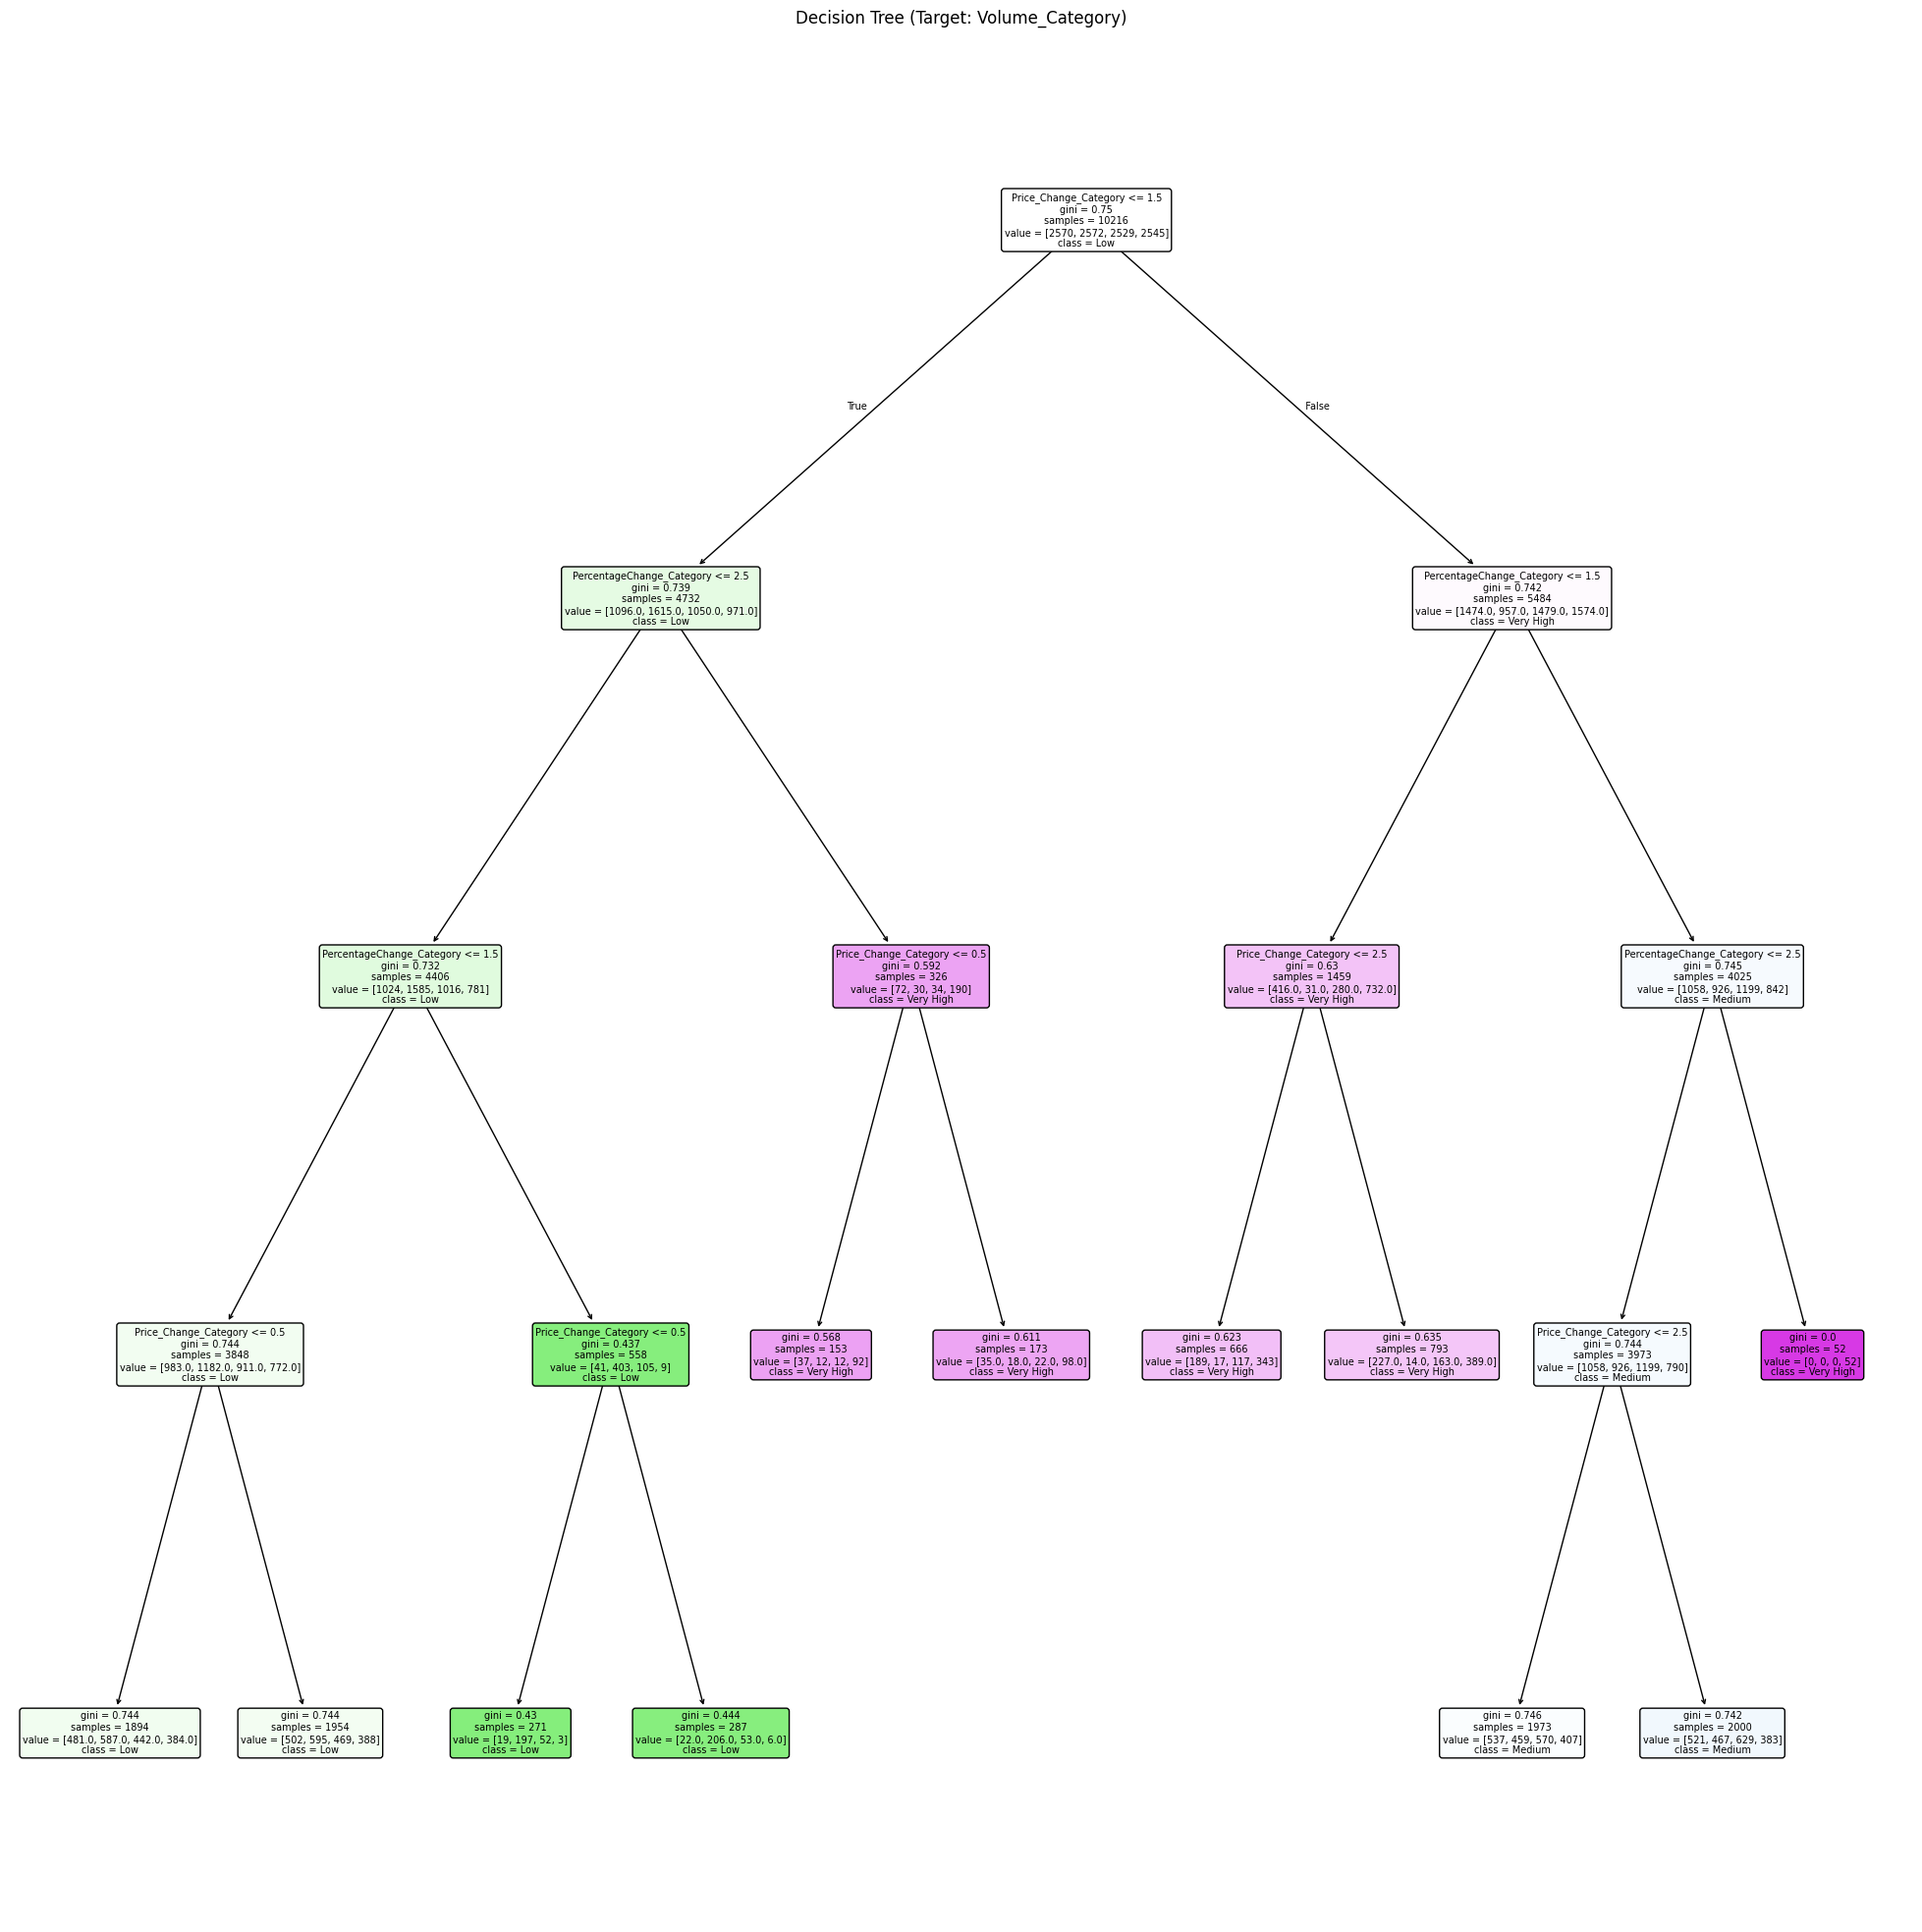

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and display the dataset
df = pd.read_csv("stock_market_data_transformed.csv")

print("Transformed Data (first 5 rows):")
print(df.head())

# Model 1
features_1 = ['Direction', 'PercentageChange_Category','Price_Change_Category']
target_variable_1 = 'Volume_Category'

X_1 = df[features_1]
y_1 = df[target_variable_1]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Encode categorical variables
encoder_1 = LabelEncoder()
for col in features_1:
    X_train_1[col] = encoder_1.fit_transform(X_train_1[col].astype(str))
    X_test_1[col] = encoder_1.transform(X_test_1[col].astype(str))

# Train Decision Tree
dt_model_1 = DecisionTreeClassifier(random_state=42)
dt_model_1.fit(X_train_1, y_train_1)
y_pred_1 = dt_model_1.predict(X_test_1)

# Print Train and Test data
print("\nDecision Tree Classification Model 1: Training Data (features):")
print(X_train_1.head())
print("\nDecision Tree Classification Model 1: Testing Data (features):")
print(X_test_1.head())

# Evaluate model
print(f"\nDecision Tree Classification Report (Target: {target_variable_1}):")
print(classification_report(y_test_1, y_pred_1, zero_division=0))
print(f"Decision Tree Confusion Matrix (Target: {target_variable_1}):")
print(confusion_matrix(y_test_1, y_pred_1))
print(f"Decision Tree Accuracy (Target: {target_variable_1}): {accuracy_score(y_test_1, y_pred_1):.4f}")

# Plot the tree
plt.figure(figsize=(25,25))
plot_tree(dt_model_1, feature_names=features_1, class_names=dt_model_1.classes_, filled=True, rounded=True)
plt.title(f"Decision Tree (Target: {target_variable_1})")
plt.savefig(f"Decision_Tree_{target_variable_1}.png", dpi=300)
plt.show()


##Model 2


Decision Tree Classification Model 2: Training Data (features):
       Direction  Volume_Category  PercentageChange_Category
5933           1                0                          0
2648           1                0                          0
1508           1                2                          2
6717           0                3                          2
11917          0                1                          1

Decision Tree Classification Model 2: Testing Data (features):
       Direction  Volume_Category  PercentageChange_Category
5350           1                3                          0
10659          1                2                          2
3919           1                3                          0
4617           1                3                          0
12067          1                1                          2

Decision Tree Classification Report (Target: Price_Change_Category):
              precision    recall  f1-score   support

    Big Drop  

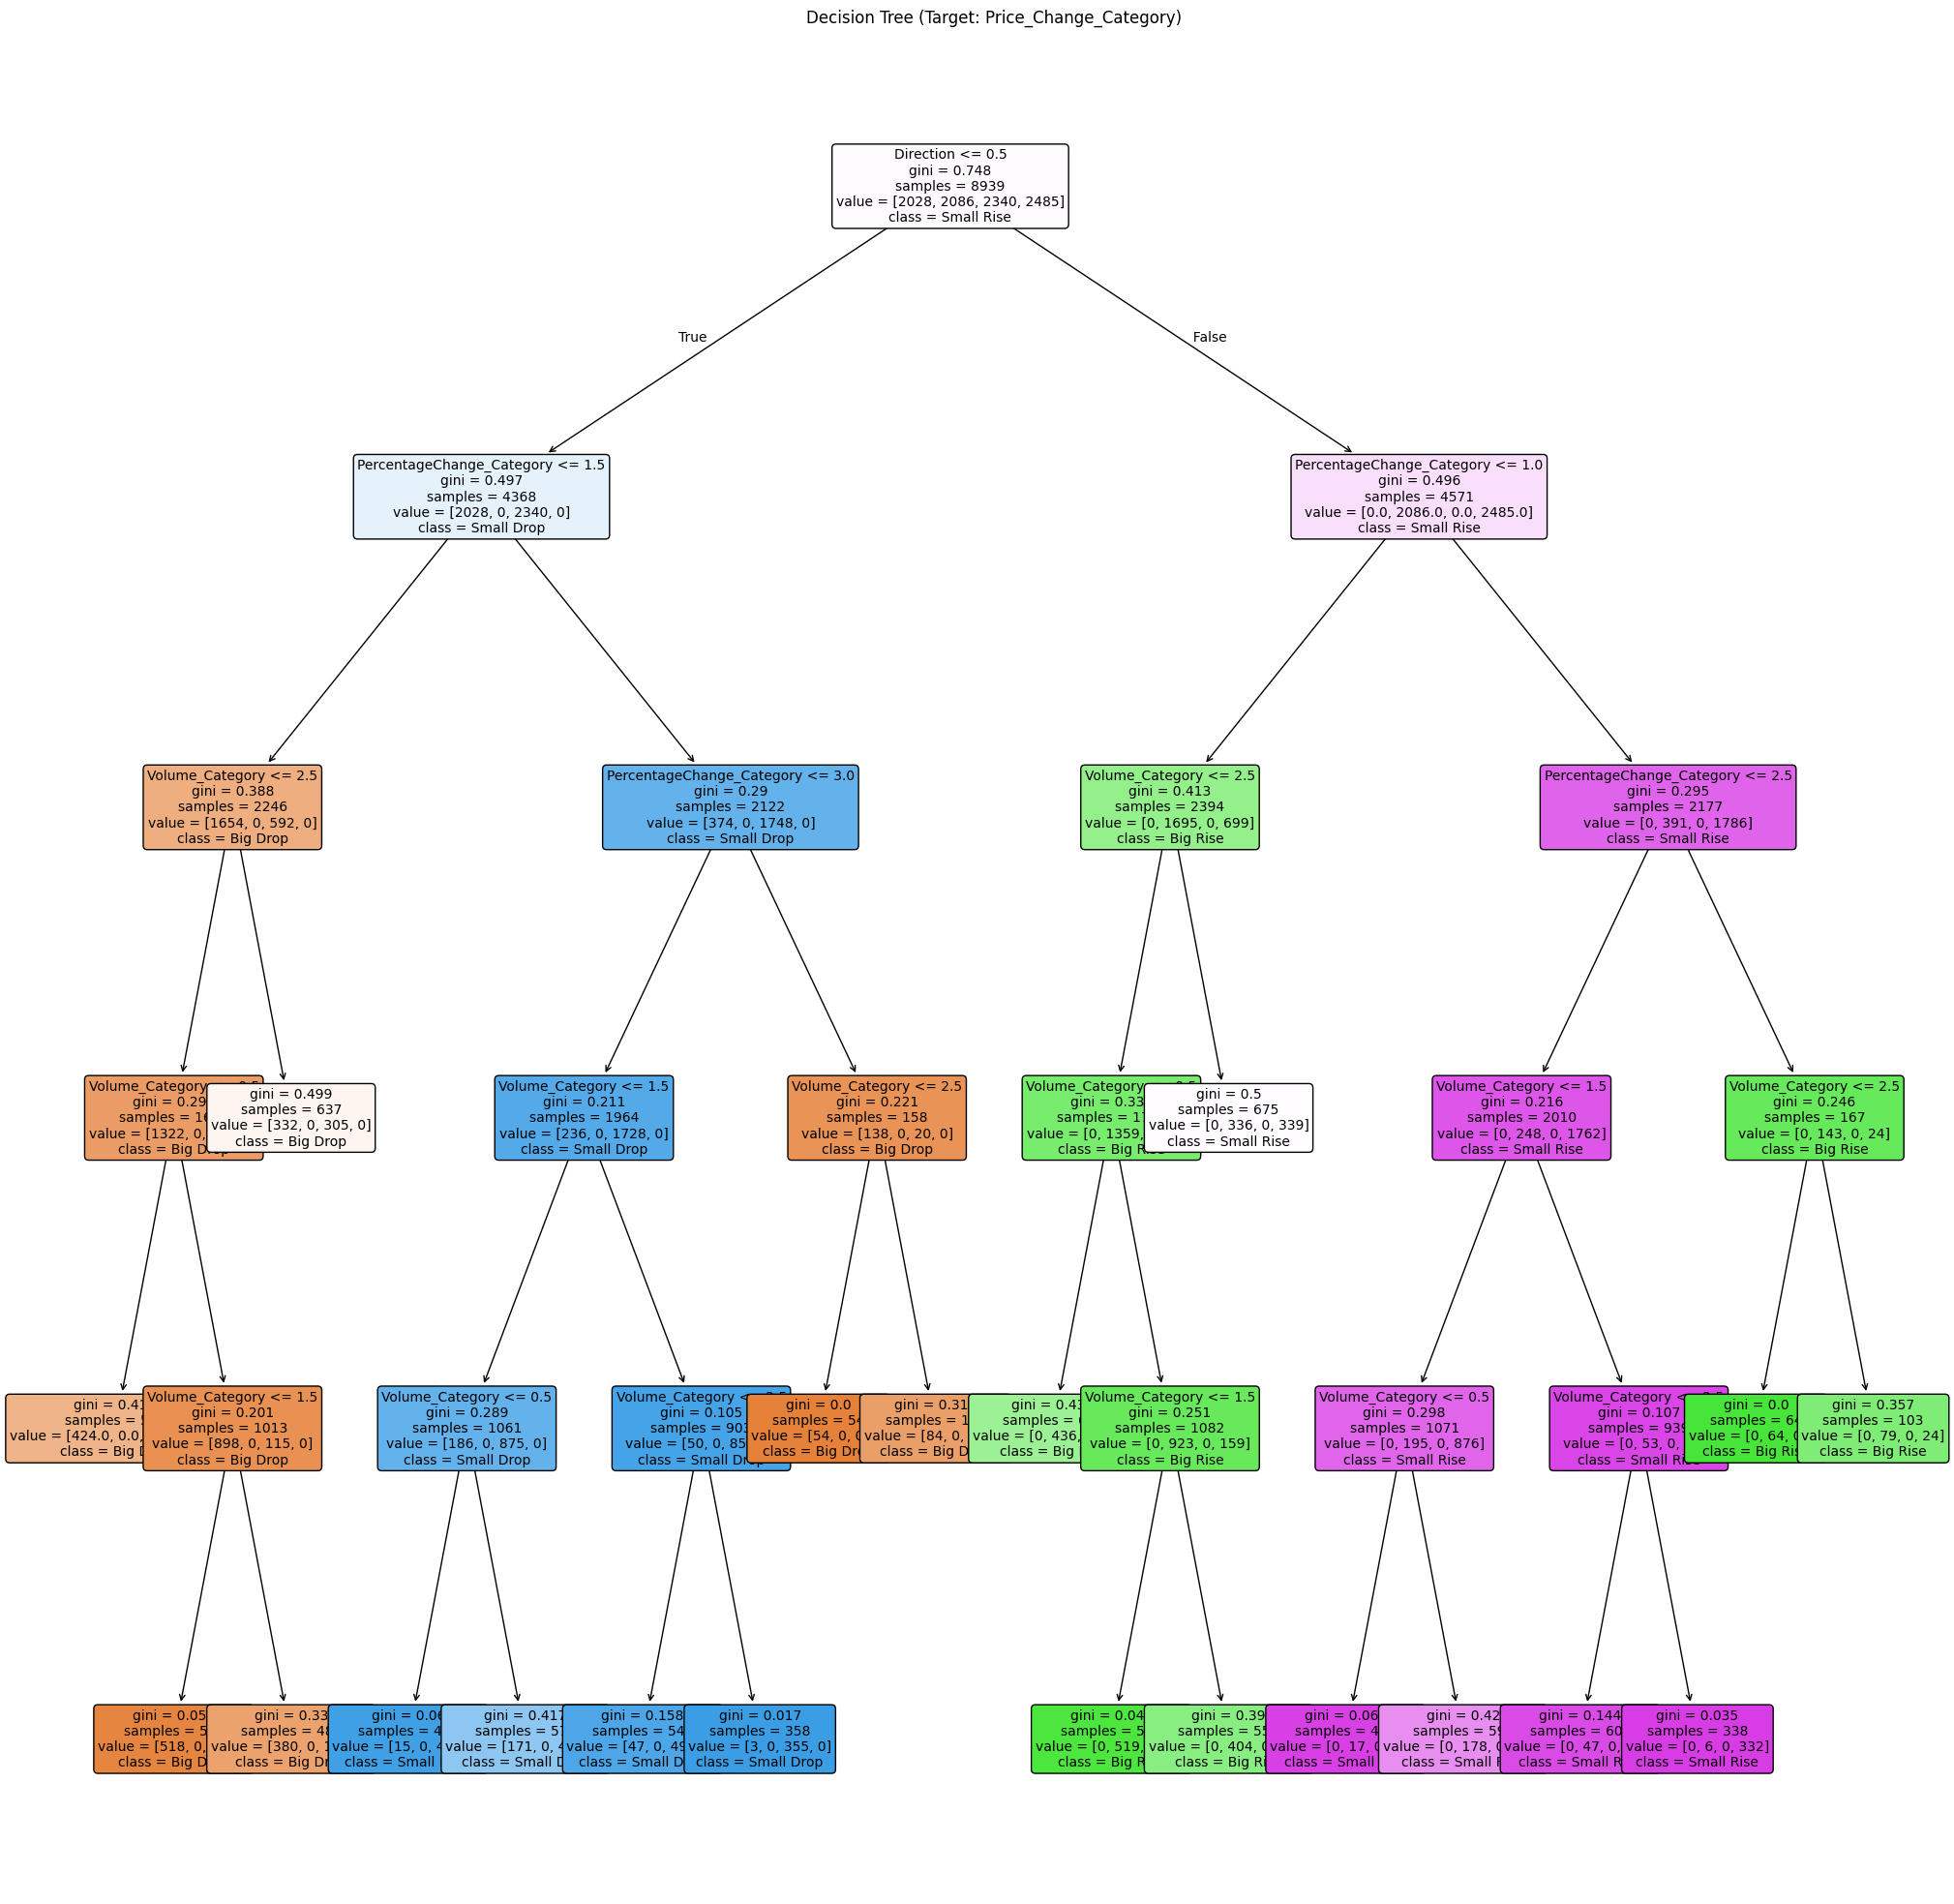

In [92]:
# Model 2
features_2 = ['Direction', 'Volume_Category', 'PercentageChange_Category']
target_variable_2 = 'Price_Change_Category'

X_2 = df[features_2]
y_2 = df[target_variable_2]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

# Encode categorical variables
encoder_2 = LabelEncoder()
for col in features_2:
    X_train_2[col] = encoder_2.fit_transform(X_train_2[col].astype(str))
    X_test_2[col] = encoder_2.transform(X_test_2[col].astype(str))

# Train Decision Tree
dt_model_2 = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model_2.fit(X_train_2, y_train_2)
y_pred_2 = dt_model_2.predict(X_test_2)

# Print Train and Test data
print("\nDecision Tree Classification Model 2: Training Data (features):")
print(X_train_2.head())
print("\nDecision Tree Classification Model 2: Testing Data (features):")
print(X_test_2.head())

# Evaluate model
print(f"\nDecision Tree Classification Report (Target: {target_variable_2}):")
print(classification_report(y_test_2, y_pred_2, zero_division=0))
print(f"Decision Tree Confusion Matrix (Target: {target_variable_2}):")
print(confusion_matrix(y_test_2, y_pred_2))
print(f"Decision Tree Accuracy (Target: {target_variable_2}): {accuracy_score(y_test_2, y_pred_2):.4f}")

# Plot the tree
plt.figure(figsize=(25, 25))
plot_tree(dt_model_2, feature_names=features_2, class_names=dt_model_2.classes_, filled=True, rounded=True, fontsize=10)
plt.title(f"Decision Tree (Target: {target_variable_2})")
plt.savefig(f"Decision_Tree_{target_variable_2}.png", dpi=300)
plt.show()

##Model 3


Decision Tree Classification Model 3: Training Data (features):
       Direction  Price_Change_Category  Volume_Category
5933           1                      1                0
2648           1                      3                0
1508           1                      3                2
6717           0                      2                3
11917          0                      0                1

Decision Tree Classification Model 3: Testing Data (features):
       Direction  Price_Change_Category  Volume_Category
5350           1                      1                3
10659          1                      3                2
3919           1                      3                3
4617           1                      1                3
12067          1                      3                1

Decision Tree Classification Report (Target: PercentageChange_Category):
                  precision    recall  f1-score   support

   Moderate Gain       0.73      0.88      0.80      1

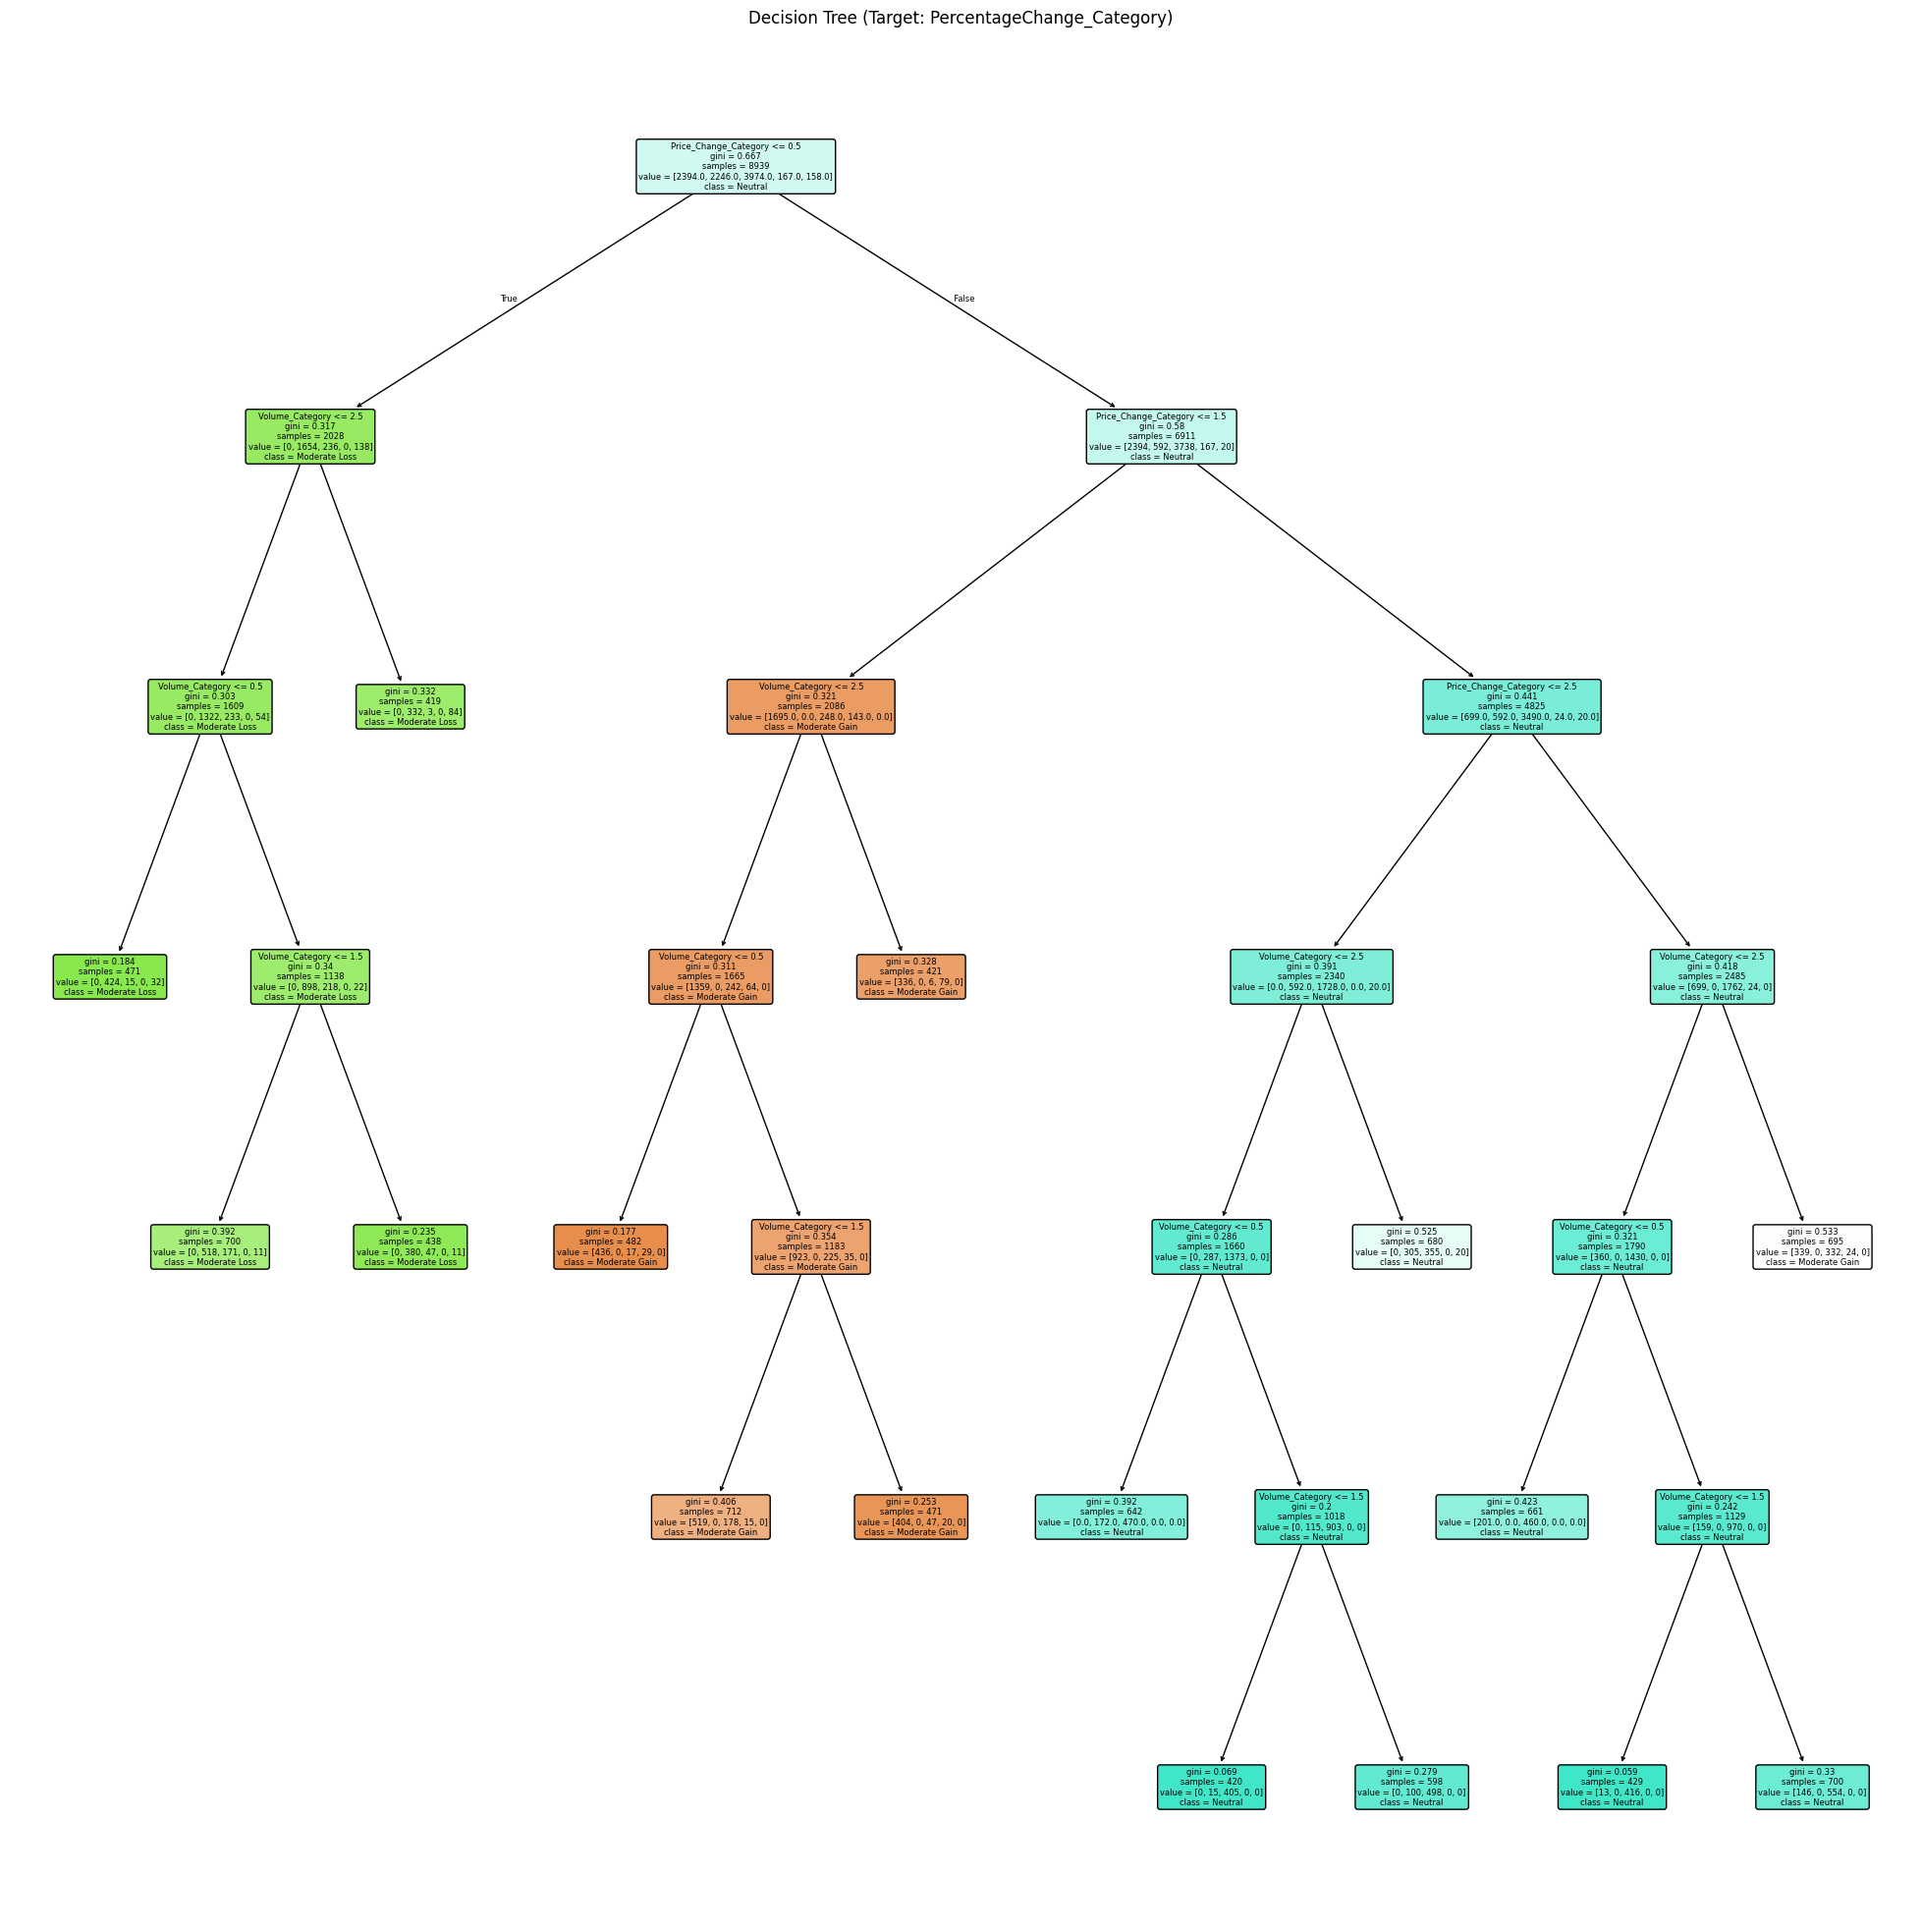

In [93]:
# Model 3
features_3 = ['Direction', 'Price_Change_Category', 'Volume_Category']
target_variable_3 = 'PercentageChange_Category'

X_3 = df[features_3]
y_3 = df[target_variable_3]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=42)

# Encode categorical variables
encoder_3 = LabelEncoder()
for col in features_3:
    X_train_3[col] = encoder_3.fit_transform(X_train_3[col].astype(str))
    X_test_3[col] = encoder_3.transform(X_test_3[col].astype(str))

# Train Decision Tree
dt_model_3 = DecisionTreeClassifier(random_state=42)
dt_model_3.fit(X_train_3, y_train_3)
y_pred_3 = dt_model_3.predict(X_test_3)

# Print Train and Test data
print("\nDecision Tree Classification Model 3: Training Data (features):")
print(X_train_3.head())
print("\nDecision Tree Classification Model 3: Testing Data (features):")
print(X_test_3.head())

# Evaluate model
print(f"\nDecision Tree Classification Report (Target: {target_variable_3}):")
print(classification_report(y_test_3, y_pred_3, zero_division=0))
print(f"Decision Tree Confusion Matrix (Target: {target_variable_3}):")
print(confusion_matrix(y_test_3, y_pred_3))
print(f"Decision Tree Accuracy (Target: {target_variable_3}): {accuracy_score(y_test_3, y_pred_3):.4f}")

# Plot the tree
plt.figure(figsize=(25, 25))
plot_tree(dt_model_3, feature_names=features_3, class_names=dt_model_3.classes_, filled=True, rounded=True)
plt.title(f"Decision Tree (Target: {target_variable_3})")
plt.savefig(f"Decision_Tree_{target_variable_3}.png", dpi=300)
plt.show()


##LogisticRegression

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset (update path if needed)
df = pd.read_csv("stock_market_data.csv")

# Drop unwanted columns and reset index
df = df.drop(['Open', 'High', 'Low', 'Close', 'Ticker','Date'], axis=1).reset_index(drop=True)


# Create binary label "Direction": Up if PercentageChange >= 0, else Down
df['Direction'] = np.where(df['PercentageChange'] >= 0, 'Up', 'Down')

# Select continuous features and target for Logistic Regression
features_lr = [ 'Volume', 'Daily_Change', 'PercentageChange']
X_lr = df[features_lr]
y_lr = df['Direction']

# Split the data (70% training, 30% testing)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

# Display first few rows of cleaned data
print("first few rows of cleaned data for  Logistic Regression:")
print(df.head())

df.to_csv("Regression_data.csv", index=False)

# (Optional) Display sample training and testing sets
print("Logistic Regression: Training Set Sample:")
print(X_train_lr.head())
print("Logistic Regression: Training Labels Sample:")
print(y_train_lr.head())
print("Logistic Regression: Testing Set Sample:")
print(X_test_lr.head())
print("Logistic Regression: Testing Labels Sample:")
print(y_test_lr.head())

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_lr_scaled, y_train_lr)
y_pred_lr = log_reg.predict(X_test_lr_scaled)

# Evaluate Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_lr, y_pred_lr))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test_lr, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test_lr, y_pred_lr))


first few rows of cleaned data for  Logistic Regression:
      Volume  Daily_Change  PercentageChange Direction
0  135480400      0.995053          1.387394        Up
1  146322800      0.067789          0.094228        Up
2  118387200      1.455043          2.045672        Up
3  108872000     -0.351047         -0.483585      Down
4  132079200      1.459889          2.029209        Up
Logistic Regression: Training Set Sample:
          Volume  Daily_Change  PercentageChange
5933    67925100      3.450005          3.486614
2648    47094000      1.175738          1.733281
1508    30904500      1.639974          0.792510
6717   209416000     -0.087558         -0.571125
11917    8877600     -2.220001         -1.039326
Logistic Regression: Training Labels Sample:
5933       Up
2648       Up
1508       Up
6717     Down
11917    Down
Name: Direction, dtype: object
Logistic Regression: Testing Set Sample:
          Volume  Daily_Change  PercentageChange
5350    88552000      3.247498          2